In [1]:
#### Extracting MFCC's For every audio file
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import librosa
from glob import glob
from google.colab import drive
drive.mount('/content/gdrive')

audio_dataset_path='/content/gdrive/MyDrive/Major_Project/ICBHI_final_database/wave_files/'
data=pd.read_csv('/content/gdrive/MyDrive/Major_Project/ICBHI_final_database/patient_diagnosis.csv')
data

Mounted at /content/gdrive


,patient_Id,Disease
0,101,URTI
1,102,Healthy
2,103,Asthma
3,104,COPD
4,105,URTI
...,...,...
121,222,COPD
122,223,COPD
123,224,Healthy
124,225,Healthy


In [2]:
files=glob('/content/gdrive/MyDrive/Major_Project/ICBHI_final_database/wave_files/*.wav')
print("No. of audio files in taken dataset is",len(files))

No. of audio files in taken dataset is 920


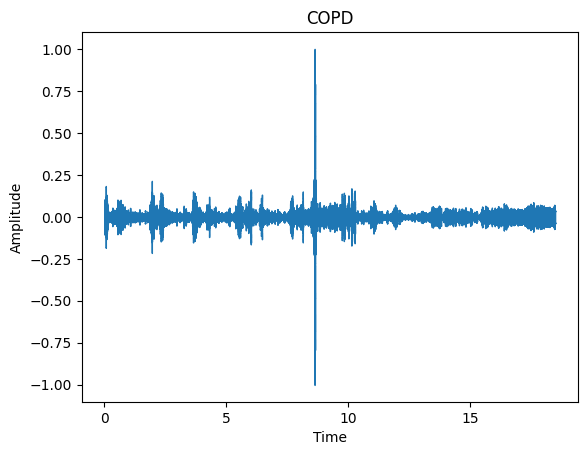

<Figure size 1200x400 with 0 Axes>

In [3]:
y, sr = librosa.load(files[0])
librosa.display.waveshow(y, sr=sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("COPD")
plt.figure(figsize=(12, 4))
plt.show()

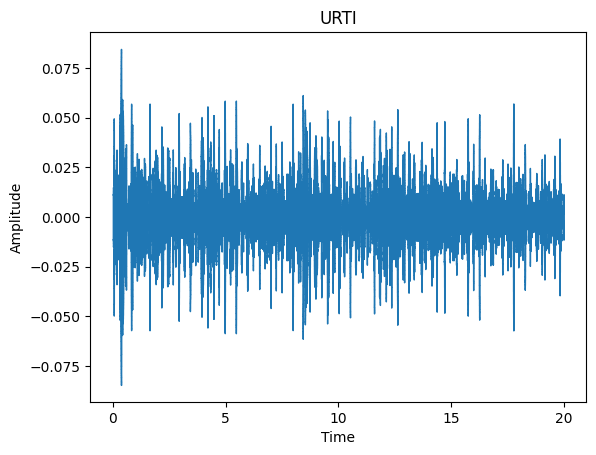

<Figure size 1200x400 with 0 Axes>

In [4]:
y, sr = librosa.load(files[51])
librosa.display.waveshow(y, sr=sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("URTI")
plt.figure(figsize=(12, 4))
plt.show()

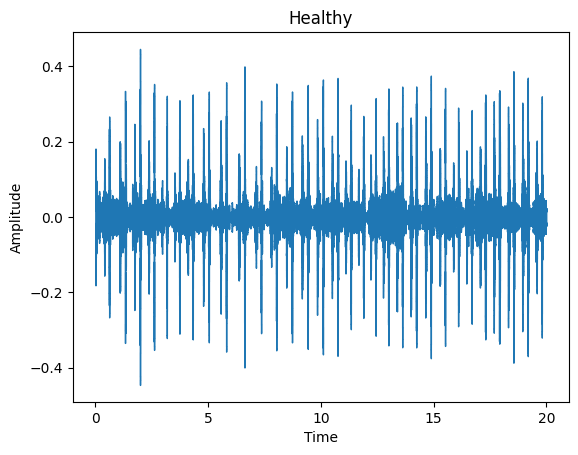

<Figure size 1200x400 with 0 Axes>

In [5]:
y, sr = librosa.load(files[40])
librosa.display.waveshow(y, sr=sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Healthy")
plt.figure(figsize=(12, 4))
plt.show()

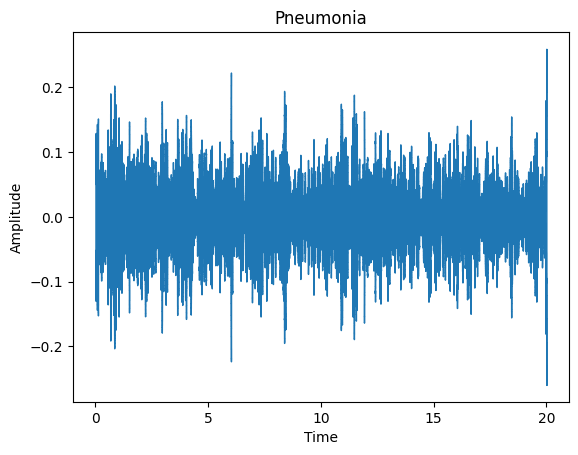

<Figure size 1200x400 with 0 Axes>

In [6]:
y, sr = librosa.load(files[55])
librosa.display.waveshow(y, sr=sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Pneumonia")
plt.figure(figsize=(12, 4))
plt.show()

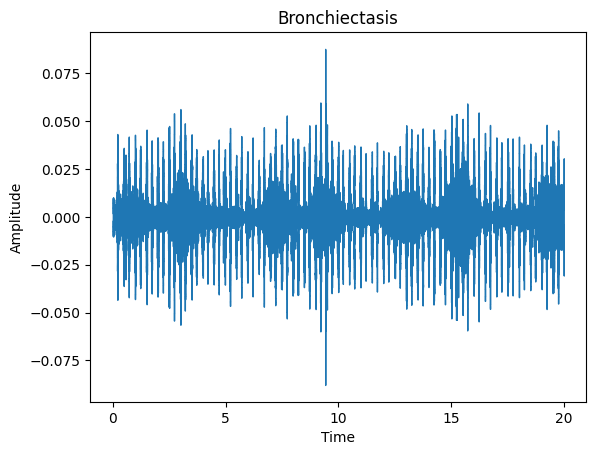

<Figure size 1200x400 with 0 Axes>

In [7]:
y, sr = librosa.load(files[52])
librosa.display.waveshow(y, sr=sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Bronchiectasis")
plt.figure(figsize=(12, 4))
plt.show()

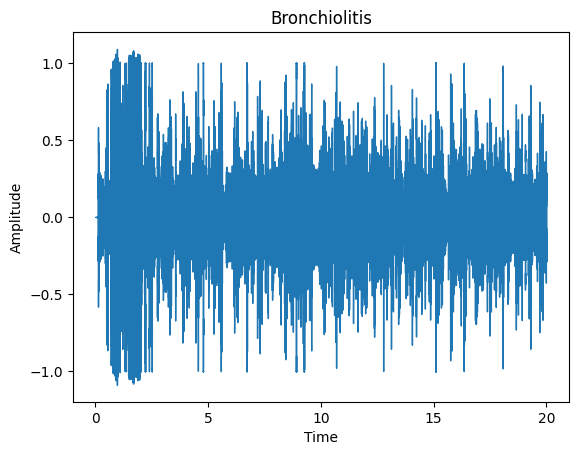

<Figure size 1200x400 with 0 Axes>

In [8]:
y, sr = librosa.load(files[224])
librosa.display.waveshow(y, sr=sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Bronchiolitis")
plt.figure(figsize=(12, 4))
plt.show()

In [9]:
audio, sf =librosa.load(files[0])
print(sf)
print(type(audio))

22050
<class 'numpy.ndarray'>


In [10]:
diagnosis = pd.read_csv('/content/gdrive/MyDrive/Major_Project/ICBHI_final_database/simple_extracted_features_df.csv')
diagnosis.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,Disease_Id
0,-350.29517,97.178185,77.049090,56.454502,39.910183,28.304533,21.135487,17.349165,15.320764,13.873403,...,0.879285,0.744374,0.700323,0.718066,0.826544,0.943023,1.035765,1.065833,1.019794,0
1,-299.68030,127.897170,46.587223,27.426277,32.336710,29.447641,21.253862,14.247361,12.528389,14.088763,...,2.358721,2.173096,1.178458,1.052596,1.967756,2.719148,1.436073,-0.696693,-0.208386,0
2,-388.23462,104.584790,50.404076,44.282290,31.175829,28.736917,21.662169,19.746120,14.553826,13.583982,...,3.014789,2.475592,2.764455,2.241044,2.680442,2.247488,2.467751,1.392687,1.745624,0
3,-277.74405,147.344850,55.125916,24.791193,31.462868,30.049180,18.900990,10.995044,10.040893,12.667876,...,3.632589,2.879391,1.270702,1.160187,2.072255,2.044492,0.335398,-1.183670,-0.284111,0
4,-363.61035,90.640335,73.752520,55.409008,39.732200,28.729020,22.285254,18.880713,16.886374,15.181063,...,1.400367,1.354774,1.291005,1.281866,1.290259,1.201254,1.036850,0.921921,0.876532,0


In [11]:
diagnosis['Disease_Id'].value_counts()

0    793
4     37
1     35
2     23
3     16
5     13
7      2
6      1
Name: Disease_Id, dtype: int64

In [12]:
data1 = diagnosis.values

In [13]:
data1 = np.delete(data1, np.where((data1[:, -1] == 6) | (data1[:, -1] == 7))[0], axis=0)

In [14]:
X, y = data1[:, :-1], data1[:, -1]

In [15]:
dict1 = {0:"COPD", 1:"Healthy", 2:"URTI", 3:"Bronchiectasis", 4:"Pneumoina", 5:"Bronchiolitis"}

In [16]:
from collections import Counter
counter = Counter(y)

Class=0.0, n=793 (86.478%)
Class=5.0, n=13 (1.418%)
Class=2.0, n=23 (2.508%)
Class=3.0, n=16 (1.745%)
Class=1.0, n=35 (3.817%)
Class=4.0, n=37 (4.035%)


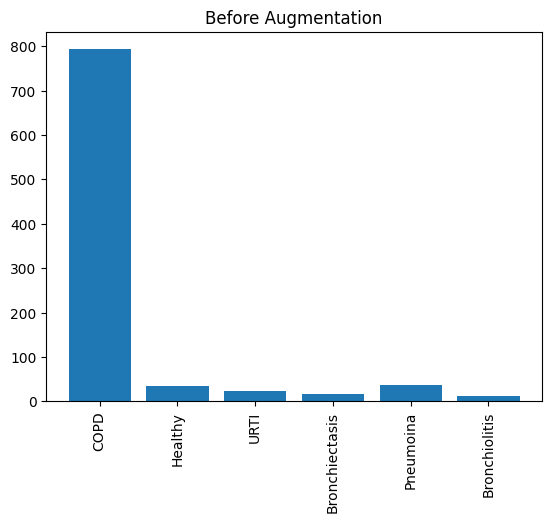

In [17]:
l = []
for i in counter.keys():
  l.append(int(i))

l1 = []
for i in l:
  l1.append(dict1[i])

for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.xticks(l, l1, rotation ='vertical')
plt.title("Before Augmentation")
plt.bar(counter.keys(), counter.values())
plt.show()

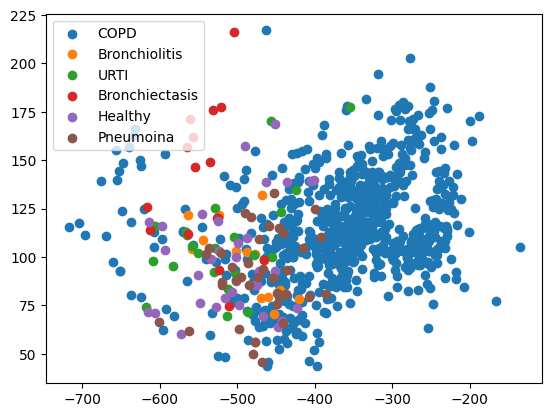

In [18]:
from numpy import where
for label, _ in counter.items():
 row_ix = where(y == label)[0]
 plt.scatter(X[row_ix, 0], X[row_ix, 1], label=dict1[label])
plt.legend()
plt.show()

Augmenting the dataset

Noise Injection

In [ ]:
import numpy as np
def manipulate(data, noise_factor):
    noise = np.random.randn(len(data))
    augmented_data = data + noise_factor * noise
    # Cast back to same data type
    augmented_data = augmented_data.astype(type(data[0]))
    return augmented_data

Original audio signal

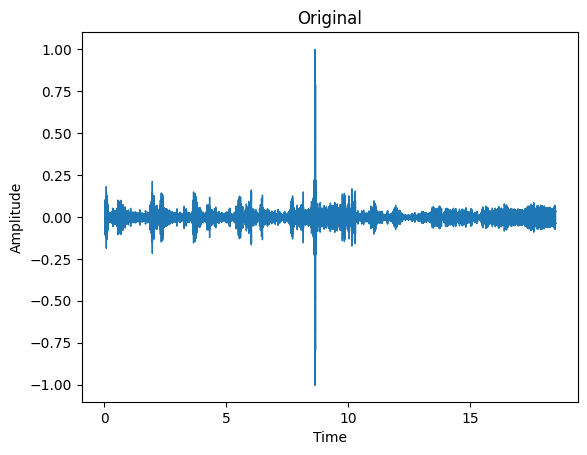

<Figure size 1200x400 with 0 Axes>

In [ ]:
data_x, sampling_rate = librosa.load(files[0])
librosa.display.waveshow(y=data_x, sr=sampling_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Original")
plt.figure(figsize=(12, 4))
plt.show()

In [ ]:
y = manipulate(data_x, 0.03)
y

array([ 0.03059974, -0.01847194, -0.02721924, ...,  0.00565544,
       -0.03162394,  0.02758204], dtype=float32)

After adding Noise to the audio signal

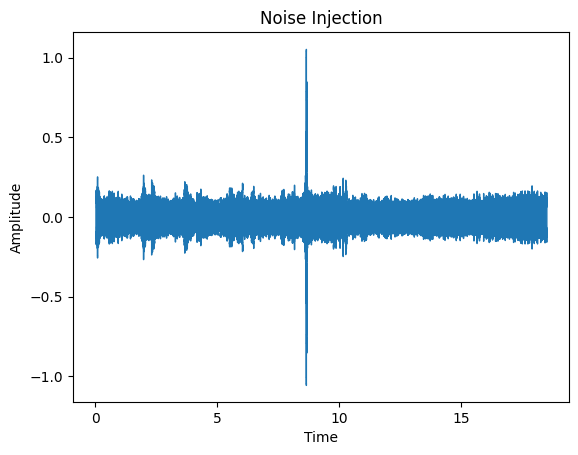

<Figure size 1200x400 with 0 Axes>

In [ ]:
# data_x, sampling_rate = librosa.load(files[0])
librosa.display.waveshow(y=y, sr=sampling_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Noise Injection")
plt.figure(figsize=(12, 4))
plt.show()

In [ ]:
# def manipulate1(data, sampling_rate, shift_max, shift_direction):
    # shift = np.random.randint(sampling_rate * shift_max)
    # if shift_direction == 'right':
    #     shift = -shift
    # elif self.shift_direction == 'both':
    #     direction = np.random.randint(0, 2)
    #     if direction == 1:
    #         shift = -shift
    # augmented_data = np.roll(data, shift)
    # # Set to silence for heading/ tailing
    # if shift > 0:
    #     augmented_data[:shift] = 0
    # else:
    #     augmented_data[shift:] = 0
def manipulate1(data,x):
    return np.roll(data, x)
    # return augmented_data

In [ ]:
y = manipulate1(data_x, 20000)
y

array([-0.06076325, -0.06075443, -0.06074484, ..., -0.06079368,
       -0.06078177, -0.060772  ], dtype=float32)

After shifting the audio signal

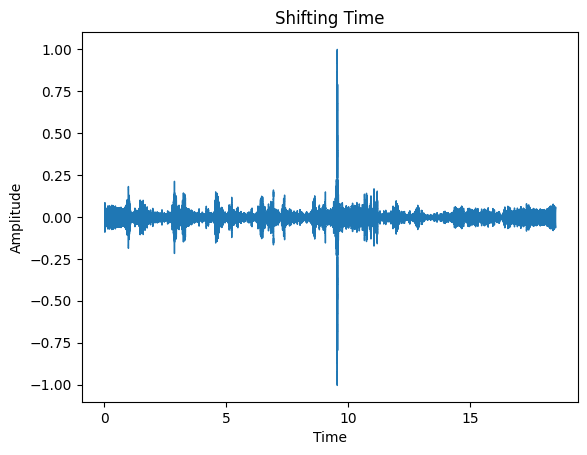

<Figure size 1200x400 with 0 Axes>

In [ ]:
librosa.display.waveshow(y=y, sr=sampling_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Shifting Time")
plt.figure(figsize=(12, 4))
plt.show()

In [ ]:
import librosa
# def manipulate2(data, speed_factor):
#     return librosa.effects.time_stretch(data, speed_factor)

In [ ]:
y = librosa.effects.time_stretch(y = data_x, rate = 1.2)
y

array([-0.00220566, -0.00221272, -0.00222466, ...,  0.00376327,
        0.00396796,  0.00404197], dtype=float32)

After time stretching the audio signal

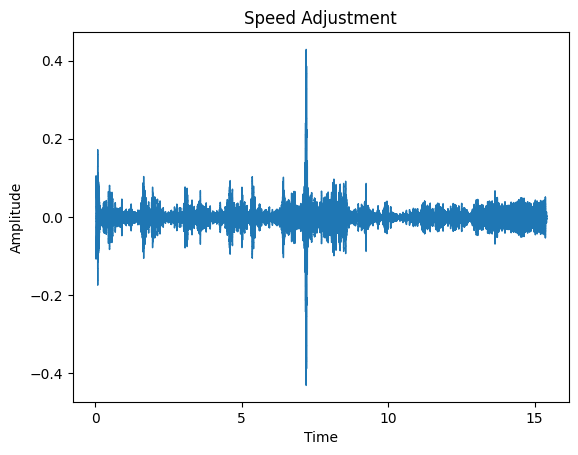

<Figure size 1200x400 with 0 Axes>

In [ ]:
librosa.display.waveshow(y=y, sr=sampling_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Speed Adjustment")
plt.figure(figsize=(12, 4))
plt.show()

In [ ]:
def add_noise(data,x):
    noise = np.random.randn(len(data))
    data_noise = data + x * noise
    return data_noise

def shift(data,x):
    return np.roll(data, x)

# def stretch(data, rate):
#     data = librosa.effects.time_stretch(data, rate)
#     return data

In [ ]:
from tqdm import tqdm
'''
  Extract feature from the Sound data. We extracted Mel-frequency cepstral coefficients( spectral
  features ), from the audio data. Augmentation of sound data by adding Noise, streaching and shifting
  is also implemented here. 40 features are extracted from each audio data and used to train the model.
  Args:
      dir_: Input directory to the Sound input file.
  Returns:
      X_: Array of features extracted from the sound file.
      y_: Array of target Labels.
'''
X_=[]
y_=[]
COPD=[]
copd_count=0
for soundDir in tqdm((os.listdir(audio_dataset_path))):
    if soundDir[-3:]=='wav'and soundDir[:3]!='103'and soundDir[:3]!='108'and soundDir[:3]!='115':
      #data_x, sampling_rate = librosa.load(dir_+soundDir,res_type='kaiser_fast')
        #mfccs = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=40).T,axis=0)
        #X_.append(mfccs)
        #y_.append(list(data[data['patient_id']==int(soundDir[:3])]['disease'])[0])

        p = list(data[data['patient_Id']==int(soundDir[:3])]['Disease'])[0]
        if (p=='COPD'):
            if (soundDir[:3] in COPD) and copd_count<5:
                data_x, sampling_rate = librosa.load(audio_dataset_path+soundDir)
                # 40 features are extracted from each audio data and used to train the model.
                mfccs = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=40).T,axis=0)
                COPD.append(soundDir[:3])
                copd_count+=1
                X_.append(mfccs)
                y_.append(list(data[data['patient_Id']==int(soundDir[:3])]['Disease'])[0])
            if (soundDir[:3] not in COPD):
                data_x, sampling_rate = librosa.load(audio_dataset_path+soundDir)
                mfccs = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=40).T,axis=0)
                COPD.append(soundDir[:3])
                copd_count=0
                X_.append(mfccs)
                y_.append(list(data[data['patient_Id']==int(soundDir[:3])]['Disease'])[0])

        if (p!='COPD'):
            data_x, sampling_rate = librosa.load(audio_dataset_path+soundDir)
            mfccs = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=40).T,axis=0)
            X_.append(mfccs)
            y_.append(list(data[data['patient_Id']==int(soundDir[:3])]['Disease'])[0])

            data_noise = add_noise(data_x,0.005)
            mfccs_noise = np.mean(librosa.feature.mfcc(y=data_noise, sr=sampling_rate, n_mfcc=40).T,axis=0)
            X_.append(mfccs_noise)
            y_.append(p)

            data_shift = shift(data_x,1600)
            mfccs_shift = np.mean(librosa.feature.mfcc(y=data_shift, sr=sampling_rate, n_mfcc=40).T,axis=0)
            X_.append(mfccs_shift)
            y_.append(p)

            data_stretch = librosa.effects.time_stretch(y=data_x, rate=1.2)
            mfccs_stretch = np.mean(librosa.feature.mfcc(y=data_stretch, sr=sampling_rate, n_mfcc=40).T,axis=0)
            X_.append(mfccs_stretch)
            y_.append(p)

            data_stretch_2 = librosa.effects.time_stretch(y=data_x, rate=0.8)
            mfccs_stretch_2 = np.mean(librosa.feature.mfcc(y=data_stretch_2, sr=sampling_rate, n_mfcc=40).T,axis=0)
            X_.append(mfccs_stretch_2)
            y_.append(p)

X_ = np.array(X_)
y_ = np.array(y_)


100%|██████████| 920/920 [03:14<00:00,  4.72it/s]


In [ ]:
df = pd.DataFrame(X_)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-477.403412,67.018898,54.495525,39.221470,26.022156,17.418203,13.355597,12.385004,12.951959,13.972430,...,0.316570,0.905445,1.828418,2.753478,3.402586,3.664344,3.583195,3.262911,2.790702,2.233784
1,-456.245300,86.772209,66.549393,43.219105,24.172537,11.904998,5.613225,4.082992,6.394209,10.865974,...,0.947520,1.224815,1.710074,2.220140,2.707141,3.132681,3.371336,3.301630,2.959306,2.530368
2,-528.425232,104.517365,69.907585,42.572124,31.213381,27.490576,22.207005,16.551100,15.276700,16.680300,...,2.385143,1.706840,1.291596,1.235050,1.438685,1.699789,1.756031,1.701586,1.754641,1.924429
3,-297.512725,23.884491,25.792839,24.447405,22.686027,20.326798,18.155373,16.061501,14.277337,12.817551,...,1.973768,1.910737,1.803113,1.690133,1.823520,1.620470,1.536848,1.798526,1.786986,1.622315
4,-529.856201,105.603203,70.153900,42.286381,31.125593,27.544903,22.286497,16.469669,15.249281,16.740376,...,2.382526,1.699690,1.289842,1.223827,1.437819,1.706355,1.772763,1.707792,1.758416,1.920199


In [ ]:
list_1 = y_.tolist()

In [ ]:
labels = []
to_hot_one = {"COPD":0, "Healthy":1, "URTI":2, "Bronchiectasis":3, "Pneumonia":4, "Bronchiolitis":5, "Asthma":6, "LRTI":7}
for i in list_1:
  labels.append(to_hot_one[i])

In [ ]:
df['Disease_Id'] = labels

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,Disease_Id
0,-477.403412,67.018898,54.495525,39.221470,26.022156,17.418203,13.355597,12.385004,12.951959,13.972430,...,0.905445,1.828418,2.753478,3.402586,3.664344,3.583195,3.262911,2.790702,2.233784,0
1,-456.245300,86.772209,66.549393,43.219105,24.172537,11.904998,5.613225,4.082992,6.394209,10.865974,...,1.224815,1.710074,2.220140,2.707141,3.132681,3.371336,3.301630,2.959306,2.530368,0
2,-528.425232,104.517365,69.907585,42.572124,31.213381,27.490576,22.207005,16.551100,15.276700,16.680300,...,1.706840,1.291596,1.235050,1.438685,1.699789,1.756031,1.701586,1.754641,1.924429,2
3,-297.512725,23.884491,25.792839,24.447405,22.686027,20.326798,18.155373,16.061501,14.277337,12.817551,...,1.910737,1.803113,1.690133,1.823520,1.620470,1.536848,1.798526,1.786986,1.622315,2
4,-529.856201,105.603203,70.153900,42.286381,31.125593,27.544903,22.286497,16.469669,15.249281,16.740376,...,1.699690,1.289842,1.223827,1.437819,1.706355,1.772763,1.707792,1.758416,1.920199,2


In [ ]:
# df.to_csv('augmented_features_df_1.csv', index = False)

In [ ]:
aug_diagnosis = pd.read_csv('/content/gdrive/MyDrive/Major_Project/ICBHI_final_database/augmented_features_df_1.csv')
aug_diagnosis.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,Disease_Id
0,-477.403412,67.018898,54.495525,39.221470,26.022156,17.418203,13.355597,12.385004,12.951959,13.972430,...,0.905445,1.828418,2.753478,3.402586,3.664344,3.583195,3.262911,2.790702,2.233784,0
1,-456.245300,86.772209,66.549393,43.219105,24.172537,11.904998,5.613225,4.082992,6.394209,10.865974,...,1.224815,1.710074,2.220140,2.707141,3.132681,3.371336,3.301630,2.959306,2.530368,0
2,-528.425232,104.517365,69.907585,42.572124,31.213381,27.490576,22.207005,16.551100,15.276700,16.680300,...,1.706840,1.291596,1.235050,1.438685,1.699789,1.756031,1.701586,1.754641,1.924429,2
3,-297.357383,23.880240,25.836295,24.204632,22.388529,20.274403,18.152266,15.890518,14.279958,12.931698,...,1.841396,1.808178,1.931978,1.712649,1.566870,1.691635,1.828960,1.719046,1.720108,2
4,-529.856201,105.603203,70.153900,42.286381,31.125593,27.544903,22.286497,16.469669,15.249281,16.740376,...,1.699690,1.289842,1.223827,1.437819,1.706355,1.772763,1.707792,1.758416,1.920199,2


In [ ]:
aug_diagnosis['Disease_Id'].value_counts()

4    185
1    175
0    164
2    115
3     80
5     65
Name: Disease_Id, dtype: int64

In [ ]:
data = aug_diagnosis.values

In [ ]:
data = np.delete(data, np.where((data[:, -1] == 6) | (data[:, -1] == 7))[0], axis=0)

In [ ]:
X, y = data[:, :-1], data[:, -1]

In [ ]:
from collections import Counter
counter = Counter(y)

In [ ]:
l = []
for i in counter.keys():
  l.append(int(i))

l1 = []
for i in l:
  l1.append(dict1[i])

Class=0.0, n=164 (20.918%)
Class=2.0, n=115 (14.668%)
Class=1.0, n=175 (22.321%)
Class=3.0, n=80 (10.204%)
Class=4.0, n=185 (23.597%)
Class=5.0, n=65 (8.291%)


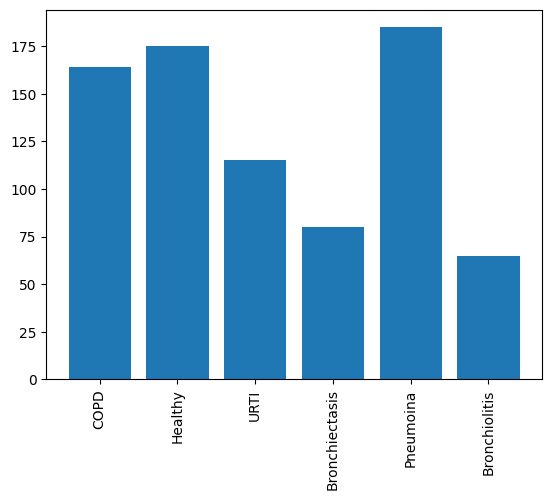

In [ ]:
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.xticks(l, l1, rotation ='vertical')
plt.bar(counter.keys(), counter.values())
plt.show()

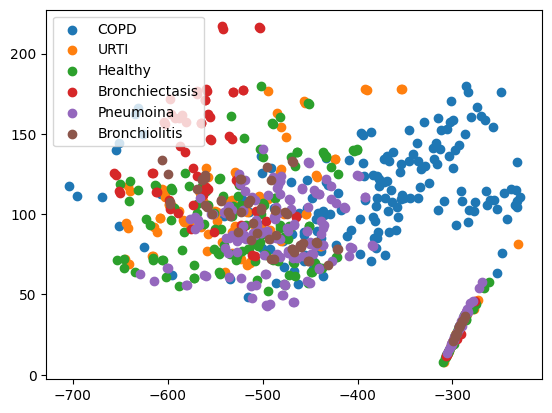

In [ ]:
from numpy import where
for label, _ in counter.items():
 row_ix = where(y == label)[0]
 plt.scatter(X[row_ix, 0], X[row_ix, 1], label=dict1[label])
plt.legend()
plt.show()

In [ ]:
label_encoder = LabelEncoder()
y = to_categorical(label_encoder.fit_transform(y))

In [ ]:
y.shape

(784, 6)

In [ ]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(627, 40)

In [ ]:
X_test.shape

(157, 40)

In [ ]:
y_train.shape

(627,)

In [ ]:
y_test.shape

(157, 6)

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
num_labels=y.shape[1]
num_labels

6

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Activation, MaxPooling1D, Dropout
from tensorflow.keras.utils import plot_model,to_categorical
from timeit import default_timer as timer
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad, Adadelta
from sklearn import metrics

In [ ]:
model = Sequential()


model.add(Conv1D(64, kernel_size=5, activation='relu', input_shape=(40,1)))
# model.add(Dropout(0.5))

model.add(Conv1D(64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(2))
# model.add(Dropout(0.5))

model.add(Conv1D(64, kernel_size=5, activation='relu'))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# model.add(Conv1D(64, kernel_size=5, activation='relu', input_shape=(40, 1)))

# model.add(Conv1D(128, kernel_size=5, activation='relu'))
# model.add(MaxPooling1D(2))

# model.add(Conv1D(256, kernel_size=5, activation='relu'))

# model.add(Dropout(0.3))
# model.add(Flatten())

# model.add(Dense(512, activation='relu'))
# model.add(Dense(6, activation='softmax'))


model.add(Dense(num_labels))
model.add(Activation('softmax'))

# opt = tf.optimizers.Adam(learning_rate=0.99)
# model.compile(loss='categorical_crossentropy', optimizer=opt)

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_21 (Conv1D)          (None, 36, 64)            384       
                                                                 
 conv1d_22 (Conv1D)          (None, 32, 64)            20544     
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 16, 64)           0         
 1D)                                                             
                                                                 
 conv1d_23 (Conv1D)          (None, 12, 64)            20544     
                                                                 
 dropout_37 (Dropout)        (None, 12, 64)            0         
                                                                 
 flatten_7 (Flatten)         (None, 768)               0         
                                                      

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',
                               verbose=1, save_best_only=True)
start = datetime.now()

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=32,callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/150
20/20 [==============================] - ETA: 0s - loss: 1.9870 - accuracy: 0.1962
Epoch 1: val_loss improved from inf to 1.77146, saving model to saved_models/audio_classification.hdf5
20/20 [==============================] - 3s 46ms/step - loss: 1.9870 - accuracy: 0.1962 - val_loss: 1.7715 - val_accuracy: 0.1783
Epoch 2/150
17/20 [========================>.....] - ETA: 0s - loss: 1.7861 - accuracy: 0.2040
Epoch 2: val_loss improved from 1.77146 to 1.75844, saving model to saved_models/audio_classification.hdf5
20/20 [==============================] - 0s 19ms/step - loss: 1.7764 - accuracy: 0.2137 - val_loss: 1.7584 - val_accuracy: 0.2038
Epoch 3/150
18/20 [==========================>...] - ETA: 0s - loss: 1.7546 - accuracy: 0.2135
Epoch 3: val_loss improved from 1.75844 to 1.74989, saving model to saved_models/audio_classification.hdf5
20/20 [==============================] - 0s 18ms/step - loss: 1.7503 - accuracy: 0.2249 - val_loss: 1.7499 - val_accuracy: 0.2420
Epoch 4/

In [ ]:
model.save("model_100_32_80_20.h5")

In [ ]:
np.save('history_100_32_80_20.npy',history.history)

In [ ]:
model1 = tf.keras.models.load_model('model_250_32_80_20.h5')

In [ ]:
model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_18 (Conv1D)          (None, 36, 64)            384       
                                                                 
 conv1d_19 (Conv1D)          (None, 32, 64)            20544     
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 16, 64)           0         
 1D)                                                             
                                                                 
 conv1d_20 (Conv1D)          (None, 12, 64)            20544     
                                                                 
 dropout_32 (Dropout)        (None, 12, 64)            0         
                                                                 
 flatten_6 (Flatten)         (None, 768)               0         
                                                      

In [ ]:
history = np.load('history_250_32_80_20.npy',allow_pickle=True)

In [ ]:
# Evaluating the model on the training and testing set
score_1 = model1.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: ", score_1[1])

score_2 = model1.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: ", score_2[1])

Training Accuracy:  0.9968101978302002
Testing Accuracy:  0.9108280539512634


In [ ]:
print("Training loss: ", score_1[0])
print("Testing loss: ", score_2[0])

Training loss:  0.0222720168530941
Testing loss:  0.3664056658744812


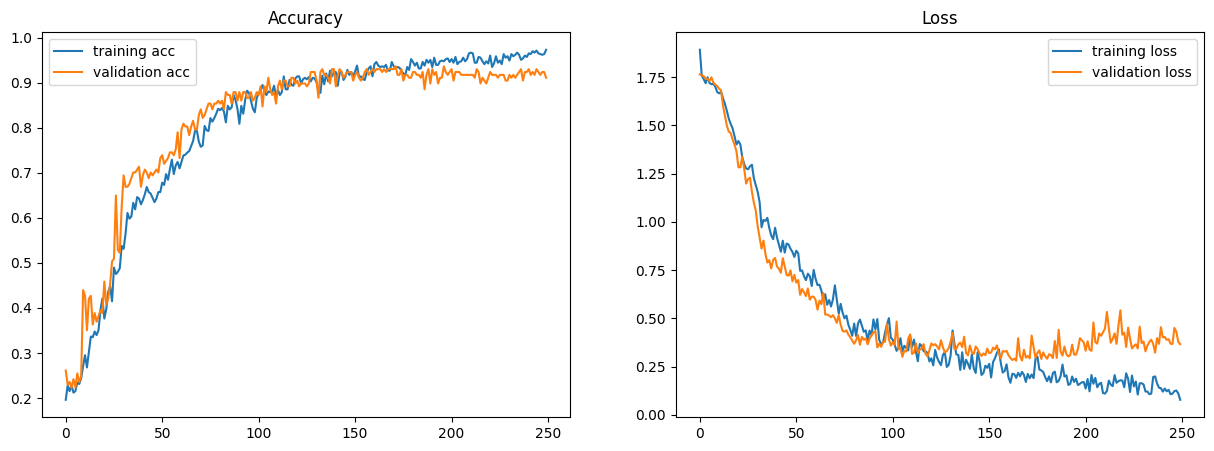

In [ ]:
# Plot accuracy and loss graphs
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title('Accuracy')
plt.plot(history.item()['accuracy'], label = 'training acc')
plt.plot(history.item()['val_accuracy'], label = 'validation acc')
plt.legend()

plt.subplot(1,2,2)
plt.title('Loss')
plt.plot(history.item()['loss'], label = 'training loss')
plt.plot(history.item()['val_loss'], label = 'validation loss')
plt.legend()

5/5 [==============================] - 0s 4ms/step
                precision    recall  f1-score   support

          COPD       1.00      0.91      0.95        32
       Healthy       0.86      0.94      0.90        32
          URTI       0.83      0.83      0.83        24
Bronchiectasis       1.00      0.95      0.97        19
     Pneumoina       0.92      0.94      0.93        35
 Bronchiolitis       0.87      0.87      0.87        15

      accuracy                           0.91       157
     macro avg       0.91      0.91      0.91       157
  weighted avg       0.91      0.91      0.91       157



<Axes: xlabel='Predicted', ylabel='Actual'>

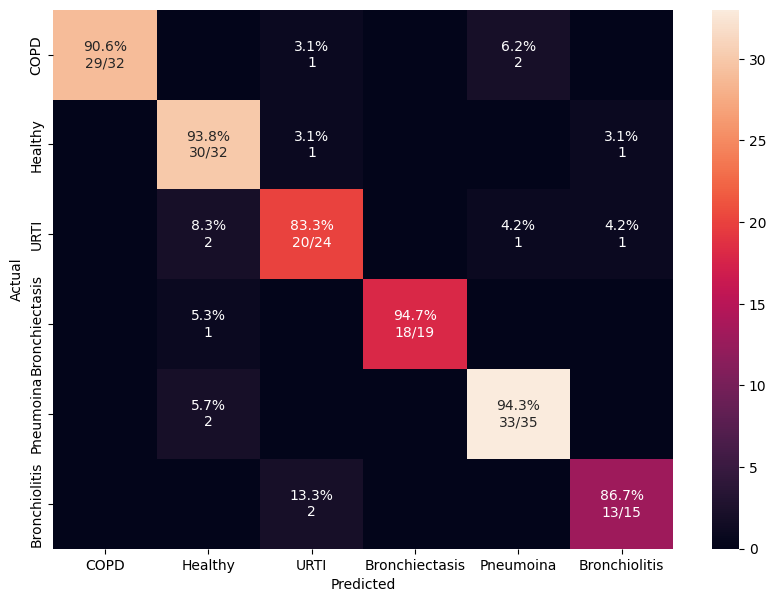

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
matrix_index = ["COPD", "Healthy", "URTI", "Bronchiectasis", "Pneumoina", "Bronchiolitis"]

preds = model1.predict(X_test)
classpreds = np.argmax(preds, axis=1) # predicted classes
y_testclass = np.argmax(y_test, axis=1) # true classes

cm = confusion_matrix(y_testclass, classpreds)
print(classification_report(y_testclass, classpreds, target_names=matrix_index))

# Get percentage value for each element of the matrix
cm_sum = np.sum(cm, axis=1, keepdims=True)
cm_perc = cm / cm_sum.astype(float) * 100
annot = np.empty_like(cm).astype(str)
nrows, ncols = cm.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm[i, j]
        p = cm_perc[i, j]
        if i == j:
            s = cm_sum[i]
            annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
        elif c == 0:
            annot[i, j] = ''
        else:
            annot[i, j] = '%.1f%%\n%d' % (p, c)


# Display confusion matrix
df_cm = pd.DataFrame(cm, index = matrix_index, columns = matrix_index)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
fig, ax = plt.subplots(figsize=(10,7))
sn.heatmap(df_cm, annot=annot, fmt='')

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
count = []
for i in counter.keys():
  count.append(int(i))
count.sort()
result=[]
for label in count:
  precision,recall,f_score,support = precision_recall_fscore_support(np.array(y_testclass) == label,np.array(classpreds) == label)
  result.append([dict1[label],recall[0],recall[1],recall[1],precision[1],f_score[1],support[1]])
df = pd.DataFrame(result,columns=["label","Specificity","Sensitivity","Recall","Precision","f_score","support"])
df

,label,Specificity,Sensitivity,Recall,Precision,f_score,support
0,COPD,1.000000,0.906250,0.906250,1.000000,0.950820,32
1,Healthy,0.960000,0.937500,0.937500,0.857143,0.895522,32
2,URTI,0.969925,0.833333,0.833333,0.833333,0.833333,24
3,Bronchiectasis,1.000000,0.947368,0.947368,1.000000,0.972973,19
4,Pneumoina,0.975410,0.942857,0.942857,0.916667,0.929577,35
5,Bronchiolitis,0.985915,0.866667,0.866667,0.866667,0.866667,15


In [ ]:
files=glob('/content/gdrive/MyDrive/Major_Project/ICBHI_final_database/wave_files/*.wav')

In [ ]:
len(files)

920

In [ ]:
len(data[:,-1])

784

In [ ]:
to_hot_one = {0:"COPD", 1:"Healthy", 2:"URTI", 3:"Bronchiectasis", 4:"Pneumonia", 5:"Bronchiolitis", 6:"Asthma", 7:"LRTI"}
count_1 = 0
count_2 = 0
count_3 = 0
count_4 = 0
count_5 = 0
count_6 = 0
for i in range(0,784):
  file_name = files[i]
  print(to_hot_one[data[:,-1][i]])
  audio, sample_rate = librosa.load(file_name)
  mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
  mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

  mfccs_scaled_features = mfccs_scaled_features.reshape(1,-1)

  predicted_label=model.predict(mfccs_scaled_features)

  classes=predicted_label.argmax()
  print(classes)

  print(to_hot_one[classes])
  if(to_hot_one[data[:,-1][i]] == 'COPD'):
    if(to_hot_one[data[:,-1][i]] == to_hot_one[classes]):
      count_1 +=1
  if(to_hot_one[data[:,-1][i]] == 'Healthy'):
    if(to_hot_one[data[:,-1][i]] == to_hot_one[classes]):
      count_2 +=1
  if(to_hot_one[data[:,-1][i]] == 'URTI'):
    if(to_hot_one[data[:,-1][i]] == to_hot_one[classes]):
      count_3 +=1
  if(to_hot_one[data[:,-1][i]] == 'Bronchiectasis'):
    if(to_hot_one[data[:,-1][i]] == to_hot_one[classes]):
      count_4 +=1
  if(to_hot_one[data[:,-1][i]] == 'Pneumonia'):
    if(to_hot_one[data[:,-1][i]] == to_hot_one[classes]):
      count_5 +=1
  if(to_hot_one[data[:,-1][i]] == 'Bronchiolitis'):
    if(to_hot_one[data[:,-1][i]] == to_hot_one[classes]):
      count_6 +=1

print('COPD :',count_1)
print('Healthy :',count_2)
print('URTI :',count_3)
print('Bronchiectasis :',count_4)
print('Pneumonia :',count_5)
print('Bronchiolitis :',count_6)

  # prediction_class = label_encoder.inverse_transform(classes)
  # print(prediction_class)

COPD
1/1 [==============================] - 0s 31ms/step
0
COPD
COPD
1/1 [==============================] - 0s 33ms/step
1
Healthy
URTI
1/1 [==============================] - 0s 43ms/step
0
COPD
URTI
1/1 [==============================] - 0s 34ms/step
2
URTI
URTI
1/1 [==============================] - 0s 48ms/step
0
COPD
URTI
1/1 [==============================] - 0s 30ms/step
0
COPD
URTI
1/1 [==============================] - 0s 45ms/step
0
COPD
COPD
1/1 [==============================] - 0s 30ms/step
2
URTI
URTI
1/1 [==============================] - 0s 33ms/step
0
COPD
URTI
1/1 [==============================] - 0s 46ms/step
0
COPD
URTI
1/1 [==============================] - 0s 51ms/step
0
COPD
URTI
1/1 [==============================] - 0s 30ms/step
0
COPD
URTI
1/1 [==============================] - 0s 29ms/step
0
COPD
COPD
1/1 [==============================] - 0s 28ms/step
0
COPD
COPD
1/1 [==============================] - 0s 32ms/step
0
COPD
COPD
1/1 [===========================